In [1]:
import os
import shutil
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime
from PIL import Image

### Read Directory

In [2]:
# Variabel Direktori
base_dir = "Dataset/Bunga"

# Membaca Direktori
print(f"Content of Base Directory : {os.listdir(base_dir)} " )

Content of Base Directory : ['Anyelir', 'Aster Cina', 'Gerbera', 'Lily Peruvian', 'Lisianthus', 'Matahari', 'Mulut Naga'] 


### Access Dataset

In [3]:
# List bunga
flowers_list = ['Anyelir','Aster Cina', 'Gerbera', 'Lily Peruvian', 'Lisianthus', 'Matahari', 'Mulut Naga']

# Melakukan akses dataset pada tiap kelas
for flower in flowers_list:
    print(f"Total Gambar Bunga {flower} : ", len(os.listdir(f'{base_dir}/{flower}')))

Total Gambar Bunga Anyelir :  50
Total Gambar Bunga Aster Cina :  50
Total Gambar Bunga Gerbera :  50
Total Gambar Bunga Lily Peruvian :  50
Total Gambar Bunga Lisianthus :  50
Total Gambar Bunga Matahari :  50
Total Gambar Bunga Mulut Naga :  50


### Resize Images to 224x224

In [4]:
input_dir = "Dataset/Bunga"
output_dir = "./resized_flowers_dataset"
target_size = (224,224)

def resize_images(input_dir, output_dir, target_size):
    # Membuat jalur direktori dengan setiap kelas pada bunga
    for flowers_type in flowers_list:
        input_dataset_dir = os.path.join(input_dir, flowers_type)
        output_dataset_dir = os.path.join(output_dir, flowers_type)
        
        if not os.path.exists(output_dataset_dir):
            os.makedirs(output_dataset_dir)
            
        # Membuat jalur direktori dengan list direktori pada tiap file di setiap kelas pada bunga
        for flowers_filename in os.listdir(input_dataset_dir):
            input_images_path = os.path.join(input_dataset_dir, flowers_filename)
            output_images_path = os.path.join(output_dataset_dir, flowers_filename)
            
            img = Image.open(input_images_path)
            resized_image = img.resize(target_size)
            resized_image.save(output_images_path)
            
resize_images(input_dir, output_dir, target_size)

print("Resize 224 x 224 piksel selesai")

Resize 224 x 224 piksel selesai


### Access dataset after resize

In [5]:
# Melakukan akses dataset pada tiap kelas
for flower in flowers_list:
    print(f"Total Gambar Bunga {flower} : ", len(os.listdir(f'{output_dir}/{flower}')))

Total Gambar Bunga Anyelir :  50
Total Gambar Bunga Aster Cina :  50
Total Gambar Bunga Gerbera :  50
Total Gambar Bunga Lily Peruvian :  50
Total Gambar Bunga Lisianthus :  50
Total Gambar Bunga Matahari :  50
Total Gambar Bunga Mulut Naga :  50


### Create dir train & val

In [6]:
root_dir = 'tmp/flowers'

if os.path.exists(root_dir):
    # Jika terdapat direktori --> mengkosongkan direktori untuk mencegah FileExistsError
    shutil.rmtree(root_dir)

# Membuat direktori training dan validation
def create_train_val_dirs(root_path):
    for flowers in flowers_list:
        os.makedirs(os.path.join(root_dir, 'training', flowers))
        os.makedirs(os.path.join(root_dir, 'validation', flowers))
            
try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

In [7]:
for rootdir, dirs, _ in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

tmp/flowers\training
tmp/flowers\validation
tmp/flowers\training\Anyelir
tmp/flowers\training\Aster Cina
tmp/flowers\training\Gerbera
tmp/flowers\training\Lily Peruvian
tmp/flowers\training\Lisianthus
tmp/flowers\training\Matahari
tmp/flowers\training\Mulut Naga
tmp/flowers\validation\Anyelir
tmp/flowers\validation\Aster Cina
tmp/flowers\validation\Gerbera
tmp/flowers\validation\Lily Peruvian
tmp/flowers\validation\Lisianthus
tmp/flowers\validation\Matahari
tmp/flowers\validation\Mulut Naga


### Split Data

In [8]:
def remove_files_in_dir(directory):
    # Jika Terdapat file, maka file akan dihapus terlebih dahulu
    if len(os.listdir(directory)) > 0:
        for file in os.scandir(directory):
            os.remove(file.path)

def split_data(source_dir, train_dir, val_dir):
    # Memastikan direktori bersih sebelum dilakukannya copas file yang baru.
    remove_files_in_dir(train_dir)
    remove_files_in_dir(val_dir)
    
    # Memfilter file dengan size harus > 0 byte
    files_list = os.listdir(source_dir)
    filtered_images = [
        file for file in files_list if os.path.getsize(
            os.path.join(source_dir, file)) > 0
    ]
    
    # Definisi split size 80 training, 20 validation
    split_size = 0.8

    # Data Split
    train_files, validation_files = train_test_split(
        filtered_images,
        train_size=split_size,
        random_state=42
    )
    
    # Copy Paste File
    for files, directory in [(train_files, train_dir), (validation_files, val_dir)]:
        for file in files:
            src = os.path.join(source_dir, file)
            dest = os.path.join(directory, file)
            shutil.copyfile(src, dest)

# List Path
flower_categories = ["Anyelir", "Aster Cina", "Gerbera", "Lily Peruvian", "Lisianthus", "Matahari", "Mulut Naga"]

# Base paths
source_base_dir = "resized_flowers_dataset"
train_base_dir = "tmp/flowers/training"
val_base_dir = "tmp/flowers/validation"

# Proses Split Data terjadi di sini
for category in flower_categories:
    source_dir = os.path.join(source_base_dir, category)
    train_dir = os.path.join(train_base_dir, category)
    val_dir = os.path.join(val_base_dir, category)
    split_data(source_dir, train_dir, val_dir)
    
print("Data Split Completed.")

Data Split Completed.


In [ ]:
# Path ke folder asal gambar
source_folder = "resized_flowers_dataset"

# Path ke folder tujuan untuk setiap label
destination_folder = '/content/train_fix'

# Membaca DataFrame
dataset_df = pd.read_csv("/content/train_data.csv")

# Iterasi melalui setiap baris dalam DataFrame
for index, row in dataset_df.iterrows():
    # Mendapatkan nama file gambar dan label
    image_filename = row['Image']
    label = row['Label']

    # Membuat path lengkap untuk file gambar
    source_path = os.path.join(source_folder, image_filename)

    # Membuat folder tujuan jika belum ada
    destination_label_folder = os.path.join(destination_folder, label)
    os.makedirs(destination_label_folder, exist_ok=True)

    # Membuat path lengkap untuk tujuan
    destination_path = os.path.join(destination_label_folder, image_filename)

    # Memindahkan file gambar ke folder tujuan
    shutil.move(source_path, destination_path)

print("Proses pemindahan selesai.")

### Cek jumlah Data

In [10]:
for source_dir, _, _ in source_dirs:
    flowers_path = os.path.normpath(source_dir)
    # os.path.normpath --> menormalisasi path contoh : '/path\\Cats' --> '\\path\\Cats'
    flowers_type = os.path.basename(flowers_path)
    # os.path.basename --> Mendapatkan nama terakhir dari path direktori, Contoh: '/path\\Cats' --> Cats
    print(f"Gambar Original Bunga {flowers_type} sebanyak : {len(os.listdir(source_dir))} gambar")

print("\nTraining Images : ")
for _, train_dir, _ in source_dirs:
    flowers_type = os.path.basename(os.path.normpath(train_dir))
    print(f"Gambar Bunga {flowers_type} : {len(os.listdir(train_dir))} gambar untuk training")

print("\nValidation Images : ")
for _, _, val_dir in source_dirs:
    flowers_type = os.path.basename(os.path.normpath(val_dir))
    print(f"Gambar Bunga {flowers_type} : {len(os.listdir(val_dir))} gambar untuk validasi")

Gambar Original Bunga Anyelir sebanyak : 50 gambar
Gambar Original Bunga Aster Cina sebanyak : 50 gambar
Gambar Original Bunga Gerbera sebanyak : 50 gambar
Gambar Original Bunga Lily Peruvian sebanyak : 50 gambar
Gambar Original Bunga Lisianthus sebanyak : 50 gambar
Gambar Original Bunga Matahari sebanyak : 50 gambar
Gambar Original Bunga Mulut Naga sebanyak : 50 gambar

Training Images : 
Gambar Bunga Anyelir : 40 gambar untuk training
Gambar Bunga Aster Cina : 40 gambar untuk training
Gambar Bunga Gerbera : 40 gambar untuk training
Gambar Bunga Lily Peruvian : 40 gambar untuk training
Gambar Bunga Lisianthus : 40 gambar untuk training
Gambar Bunga Matahari : 40 gambar untuk training
Gambar Bunga Mulut Naga : 40 gambar untuk training

Validation Images : 
Gambar Bunga Anyelir : 10 gambar untuk validasi
Gambar Bunga Aster Cina : 10 gambar untuk validasi
Gambar Bunga Gerbera : 10 gambar untuk validasi
Gambar Bunga Lily Peruvian : 10 gambar untuk validasi
Gambar Bunga Lisianthus : 10 gam

In [11]:
# Definisi Path
TRAINING_DIR = 'tmp/flowers/training'
VALIDATION_DIR = 'tmp/flowers/validation'

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 280 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


## Callback Function

In [14]:
# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('val_accuracy')>0.95):
#             print(f"\nReached 95% accuracy at {1+epoch} so cancelling training!")
#             self.model.stop_training = True

early_stopping_cb = EarlyStopping(monitor="val_accuracy",patience=5, verbose=1, restore_best_weights=True)

## Create Base Model from MobileNetV2

In [15]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape = (224,224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

In [16]:
total_params = base_model.count_params()
print(f"Total Parameters pada model : {total_params:,}")

Total Parameters pada model : 2,257,984


In [17]:
final_model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(7, activation='softmax')
])

final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 7)                 8967      
                                                                 
Total params: 2266951 (8.65 MB)
Trainable params: 8967 (35.03 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [18]:
final_model.compile(
    loss= 'categorical_crossentropy',
    optimizer= Adam(),
    metrics= ['accuracy']
)

history_model = final_model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 100,
    verbose = 2,
    callbacks=early_stopping_cb
)

Epoch 1/100
9/9 - 7s - loss: 1.8723 - accuracy: 0.2929 - val_loss: 1.3333 - val_accuracy: 0.6000 - 7s/epoch - 765ms/step
Epoch 2/100
9/9 - 4s - loss: 1.1733 - accuracy: 0.6071 - val_loss: 0.8737 - val_accuracy: 0.7571 - 4s/epoch - 400ms/step
Epoch 3/100
9/9 - 4s - loss: 0.7592 - accuracy: 0.8286 - val_loss: 0.5890 - val_accuracy: 0.9000 - 4s/epoch - 404ms/step
Epoch 4/100
9/9 - 4s - loss: 0.5463 - accuracy: 0.8821 - val_loss: 0.4249 - val_accuracy: 0.9286 - 4s/epoch - 403ms/step
Epoch 5/100
9/9 - 4s - loss: 0.4151 - accuracy: 0.9321 - val_loss: 0.3500 - val_accuracy: 0.9429 - 4s/epoch - 407ms/step
Epoch 6/100
9/9 - 4s - loss: 0.3213 - accuracy: 0.9571 - val_loss: 0.2917 - val_accuracy: 0.9429 - 4s/epoch - 401ms/step
Epoch 7/100
9/9 - 4s - loss: 0.2642 - accuracy: 0.9536 - val_loss: 0.2492 - val_accuracy: 0.9429 - 4s/epoch - 446ms/step
Epoch 8/100
9/9 - 4s - loss: 0.2552 - accuracy: 0.9607 - val_loss: 0.2226 - val_accuracy: 0.9571 - 4s/epoch - 456ms/step
Epoch 9/100
9/9 - 4s - loss: 0.2

In [1]:
train_acc = history_model.history['accuracy']
val_acc  = history_model.history['val_accuracy']
train_loss = history_model.history['loss']
val_loss  = history_model.history['val_loss']

plt.figure(figsize=(10,5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'grid_search' is not defined

### Save Model H5 extension

In [20]:
now = datetime.now()

model_name = 'flowers_{}{}_{}{}.h5'.format(now.month, now.day, now.hour, now.minute)

final_model.save(model_name)

c:\Users\Akazh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Evaluation Valid Dataset

In [21]:
evaluation_results = final_model.evaluate(val_generator)

print("Valid Loss : ", evaluation_results[0])
print("Valid Accuracy : ", evaluation_results[1])

3/3 [==============================] - 1s 198ms/step - loss: 0.1469 - accuracy: 0.9857
Valid Loss :  0.14693379402160645
Valid Accuracy :  0.9857142567634583


# Confusion Matrix

In [22]:
predictions = final_model.predict(val_generator)
classes = os.listdir(VALIDATION_DIR)

true_labels = val_generator.classes

predicted_labels = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix MobileNetV2 : ")
print(conf_matrix)

print("\n Classification Report : ")
print(classification_report(true_labels, predicted_labels, target_names=classes))

3/3 [==============================] - 1s 163ms/step
Confusion Matrix MobileNetV2 : 
[[10  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0 10  0  0  0  0]
 [ 0  0  0 10  0  0  0]
 [ 0  1  0  0  9  0  0]
 [ 0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0 10]]

 Classification Report : 
               precision    recall  f1-score   support

      Anyelir       1.00      1.00      1.00        10
   Aster Cina       0.91      1.00      0.95        10
      Gerbera       1.00      1.00      1.00        10
Lily Peruvian       1.00      1.00      1.00        10
   Lisianthus       1.00      0.90      0.95        10
     Matahari       1.00      1.00      1.00        10
   Mulut Naga       1.00      1.00      1.00        10

     accuracy                           0.99        70
    macro avg       0.99      0.99      0.99        70
 weighted avg       0.99      0.99      0.99        70



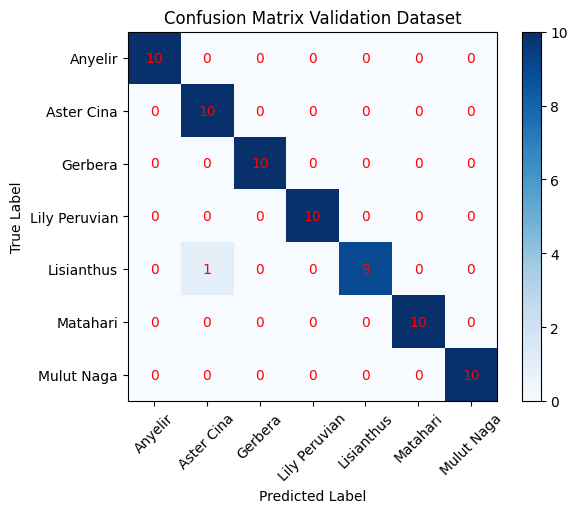

In [23]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix Validation Dataset', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='red')  # Display the numerical value in each cell

    plt.show()

# Display confusion matrix with numerical values
plot_confusion_matrix(conf_matrix, classes)